# HalfAdder no Qiskit

## 1° Parte: Iniciar e Configurar o backend e as credenciais

In [1]:
# Instalando os requisitos
# Não é necessário caso o env já tenha as bibliotecas
%pip install pylatexenc
%pip install qiskit
%pip install qiskit-ibmq-provider
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --------------------------------- ------ 8.9/10.7 MB 50.3 MB/s eta 0:00:01
     --------------------------------------  10.5/10.7 MB 54.7 MB/s eta 0:00:01
     --------------------------------------  10.5/10.7 MB 54.7 MB/s eta 0:00:01
     --------------------------------------  10.5/10.7 MB 54.7 MB/s eta 0:00:01
     --------------------------------------- 10.7/10.7 MB 12.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "c:\Users\joseg\anaconda3\envs\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\joseg\anaconda3\envs\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\joseg\anaconda3\envs\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "c:\Users\joseg\anaconda3\envs\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import qiskit
qiskit.__version__

'1.2.4'

In [3]:
# Importando as bibliotecas

from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np



In [4]:
# Parametros da função 'QiskitRuntimeService'
# channel -> especifica qual canal de serviço está sendo utilizado, No caso, 'ibm_quantum' significa que você está se conectando ao IBM Quantum, o serviço de computação quântica em nuvem da IBM.
# token -> seu token de acesso 

token_str = ''
service = QiskitRuntimeService(channel='ibm_quantum', # cloud ibm
                               token=token_str)

In [5]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token=token_str,
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

In [11]:
# Conectando ao backend

backend = service.backend(name= "ibm_brisbane")

# 2° Parte: Criar, Simular e Executar

### 1. Método Clássico:


![Half Adder](data/Half_Adder.png)

Nesse método, utiliza uma porta XOR para fazer a soma do Bit A e do Bit B e caso A = 1 e B = 1, a porta AND vai somar 1 no carry. Há diversas formas de trabalhar com o carry que vou mostrar depois

### 2. Método Quantico: 

#### 2.1. Configuração do Circuito: 
Para iniciar o circuito precisamos declarar 3 Qubits, 2 Qubits de entrada (A e B) e 1 Qubit para o Carry (vai-um) e alguns bits clássicos correspondentes para armazenar o resultado

#### 2.2. Definição dos dados de entrada
Vamos utilizar **portas X** ou *x-gates* para definir os estados de entrada de A e B, permitindo testar todas as combinações (00, 01, 10, 11). 
A **porta x** equivale a *NOT* quântica, ou seja, inverte o estado do qubit.

#### 2.3. Implementação da porta XOR para realizar a soma
Usaremos a **porta CNOT** para realizar a operação de A ⊕ B
* Controle no qubit A e alvo no qubit B.
* O resultado da soma será armazenado no qubit B.

#### 2.4. Implementação da porta AND para armazenar o Carry
Usaremos a **porta toffoli** que é o equivalente ao **AND** e irá armazenar no Qubit auxiliar



In [30]:
# Implementação do halfadder

qc = QuantumCircuit(3, 2) # declarando 3 qubits e 2 bits clássicos

qc.x(0) # Define A = 1
qc.x(1) # Define B = 1
# para usar outras combinações é so não aplicar a porta x

qc.ccx(0, 1, 2) # (controle1, controle2, alvo)
# Aplicando a porta toffoli e armazenando o resultado da operação no alvo ou qubit 2

qc.cx(0, 1) # (controle, alvo)
# Aplicando a porta CNOT (XOR) ao bit 0 e 1, no qual o qubit 1 vai armazenar a soma

qc.measure(1, 0)  # Soma (S)
qc.measure(2, 1)  # Carry (C)
# Medimos o qubit 1 (soma) e armazenamos o resultado no bit clássico 0.
# Medimos o qubit 2 (carry) e armazenamos o resultado no bit clássico 1.

### 3. Simulação dos métodos

Resultados da simulação:
{'10': 1024}


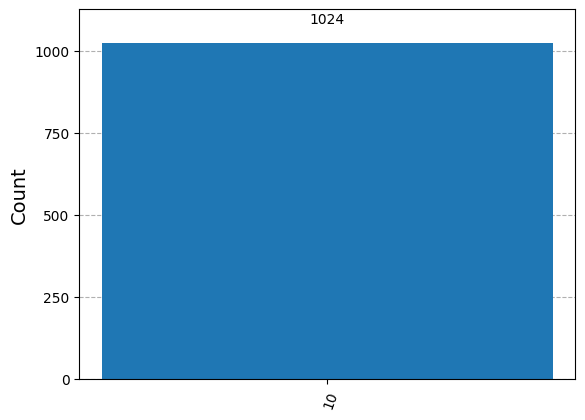

In [14]:
# Seleciona o simulador AerSimulator
simulador = AerSimulator()

# Transpila o Circuito para o backend escolhido (nesse caso o brisbane)
qc_transpilado = transpile(qc, simulador)

# Executa o circuito no simulador com 1024 execuções (shots)
job = simulador.run(qc_transpilado, shots=1024)

# Obtém os resultados
resultado = job.result()

# Obtém a contagem dos resultados
contagens = resultado.get_counts(qc_transpilado)

# Exibe os resultados
print("Resultados da simulação:")
print(contagens)

plot_histogram(contagens)


### 4. Execução do método

#### 4.1. Método Quântico

#### 4.1.1. Execução


In [32]:
qc_transpilado = transpile(qc, backend, optimization_level=3)# Transpilando para o backend em especifico
job = backend.run(qc_transpilado, shots=1024) # Executando no backend

C:\Users\joseg\AppData\Local\Temp\ipykernel_2488\1570877220.py:2: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(qc_transpilado, shots=1024) # Executando no backend


#### 4.1.2. Resultados

In [6]:
# Código generico para pegar qualquer resultado
# job_id e conectando com o trabalho em especifico
#preevious results
job = service.job('cw6z195bhxtg008wdjz0')
job_result = job.result()

In [35]:
# Obtendo resultados, um dicionario com as ocorrencias

data = job_result # Objeto do resultado
threshold = 0
resultados = data.results[0].data.counts
print(resultados)

{'0x1': 24, '0x0': 30, '0x2': 937, '0x3': 33}


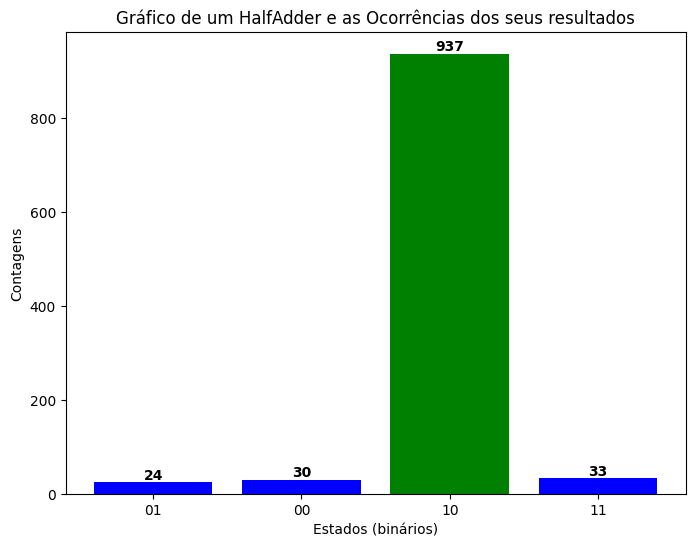

In [70]:
data_bin = {format(int(k, 16), '02b'): v for k, v in resultados.items()}

# Separar as chaves e valores
keys = list(data_bin.keys())
values = list(data_bin.values())
color = ['green' if k == bin(0x2)[2:] else 'blue' for k in data_bin.keys()]


# Plotar o gráfico de barras com os números binários formatados e os valores sobre as barras
plt.figure(figsize=(8, 6))
bars = plt.bar(keys, values, color=color)

# Adicionar os valores no topo de cada barra
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', color='black', fontweight='bold')

plt.title("Gráfico de um HalfAdder e as Ocorrências dos seus resultados")
plt.xlabel("Estados (binários)")
plt.ylabel("Contagens")
plt.show()


### 5. Visualização do método

#### 5.1. Método Quântico

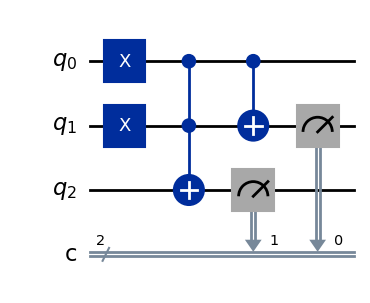

In [34]:
qc.draw(output='mpl')
#qc_transpilado.draw(output='mpl')